## Challenge 1
* Do a function to simulate a rolling dice 10 times and save the information in a dataframe.
* Plot the values sorted by value.
* Calculate the frequency distribution and plot it. What is the relation between this plot and the other one? Describe it with words.

In [1]:
import random;
import pandas as pd;
import matplotlib.pyplot as plt;

In [2]:
# Variables.
times = 10;

# Find the result of rolling a dice 10 times and store it in a dataframe.
def roll_the_dice():
    return pd.DataFrame(random.choices(range(1,7), k=times), columns=['Value'], index=range(1, times+1));

# Sort the values.
dice_results = roll_the_dice();
sorted_dice_results = dice_results.sort_values('Value');

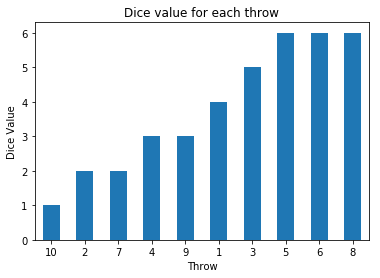

In [3]:
# Plot the sorted values.
sorted_dice_results[['Value']].plot(kind='bar', legend=None, rot=0);
plt.xlabel('Throw');
plt.ylabel('Dice Value');
plt.title('Dice value for each throw');
plt.show();

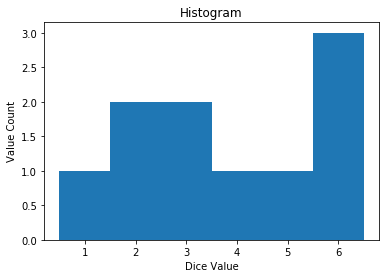

In [4]:
# Calculate the frequency distribution.
bins = [n + 0.5 for n in range(0,7)];
dice_results.hist(bins=bins, grid=False);
plt.xlabel('Dice Value');
plt.ylabel('Value Count');
plt.title('Histogram');

# Show the plot.
plt.show();

`Comments:`

Both plots shows how many times a number has been rolled. From both plots we can see that number 1 only showed 1 times, number 2 showed 3 times, etc.

## Challenge 2
With the results of your dice of the challenge 1, define some functions to calculate the mean in two ways:
* Summing all the observations separately (no method allowed!)
* Calculate first the frequency distribution and then the mean with the values of the distribution (no other methods allowed!)
* Define a function to calculate the median. No method allowed!
**Hint**: depending on the number of observations you need to define two cases.
* Using your last function, use it to define a function that will calculate the four quartiles.

In [5]:
def reset_df_indexes(df):
    df = df.reset_index(drop=True)
    df.index = range(1,len(df)+1)
    return df

def mean_calculation_method_one(df):
    return df['Value'].sum() / len(df['Value'])

def mean_calculation_method_two(df):
    frequency = df['Value'].value_counts().values
    dice_value = df['Value'].value_counts().index
    return sum(dice_value * frequency) / len(df['Value'])

def median_calculation(df):
    if len(df['Value']) % 2 == 0:
        return (df['Value'][len(df) // 2] + df['Value'][(len(df) // 2)+1]) / 2
    else:
        return float(df['Value'][(len(df) // 2)+1])

def quartiles_calculation(df):
    Q2 = median_calculation(df)
    lower_df = df[df['Value'] < Q2]
    upper_df = df[df['Value'] > Q2]
    upper_df = reset_df_indexes(upper_df)
    Q1 = median_calculation(lower_df)
    Q3 = median_calculation(upper_df)
    return Q1,Q2,Q3

In [6]:
sorted_dice_results = reset_df_indexes(sorted_dice_results)
Q1, Q2, Q3 = quartiles_calculation(sorted_dice_results)

print('The event was: \n\n {}\n'.format(sorted_dice_results))
print('Mean Method 1: {}'.format(mean_calculation_method_one(dice_results)))
print('Mean Method 2: {}'.format(mean_calculation_method_two(dice_results)))
print('Median: {}'.format(median_calculation(sorted_dice_results)))
print('Quartiles: Q1-{} Q2-{} Q3-{}'.format(Q1,Q2,Q3))

The event was: 

     Value
1       1
2       2
3       2
4       3
5       3
6       4
7       5
8       6
9       6
10      6

Mean Method 1: 3.8
Mean Method 2: 3.8
Median: 3.5
Quartiles: Q1-2.0 Q2-3.5 Q3-6.0


## Challenge 3
Read the csv `roll_the_dice_hundred.csv`
* Plot the values sorted. What do you see?
* With the functions you defined in the challenge 2, calculate the mean of the rollings.
* Calculate the frequency distribution.
* Plot the histogram as we did during the lesson. What do you see? (shape, values...) how could you connect the value of the mean to the plot you see? 
* Now read the `roll_the_dice_thousand.csv` and plot the frequency distribution in the same way you did it before.
What has changed? Why do you think it is changing?

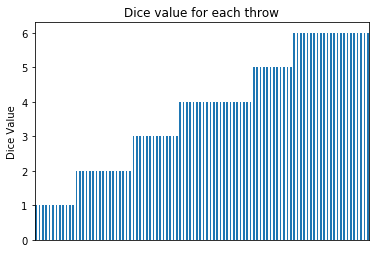

In [7]:
# Read the csv.
roll_the_dice_hundred = pd.read_csv('data/roll_the_dice_hundred.csv', index_col=0)
roll_the_dice_hundred.columns = ['Roll', 'Value']

# Sort the values.
sorted_roll_the_dice_hundred = roll_the_dice_hundred.sort_values('Value')

# Plot the sorted values.
sorted_roll_the_dice_hundred[['Value']].plot(kind='bar', legend=None, rot=0)
plt.xticks([])
plt.ylabel('Dice Value')
plt.title('Dice value for each throw')
plt.show()

`Comments:`

We can see if a number was rolled more times than another one. For example, we can see than number 1 showed less times than number 6. 

In [8]:
print('Mean Method 1: {}'.format(mean_calculation_method_one(roll_the_dice_hundred)))
print('Mean Method 2: {}'.format(mean_calculation_method_two(roll_the_dice_hundred)))

Mean Method 1: 3.74
Mean Method 2: 3.74


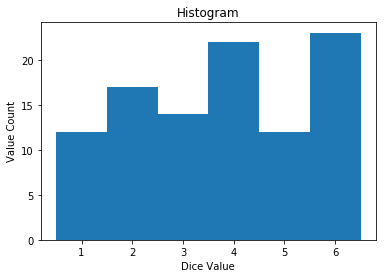

1    12
2    17
3    14
4    22
5    12
6    23
Name: Value, dtype: int64

In [9]:
# Calculate the frequency distribution.
frequency = roll_the_dice_hundred['Value'].value_counts(sort=False)

# Histogram.
bins = [n + 0.5 for n in range(0,7)]
roll_the_dice_hundred['Value'].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')

# Show the plot.
plt.show()
frequency

`Comments:`

We know that the probability of each number is the same (1/6), so the frequency of each number should be similar and we should expect to see a uniform histogram. However, we can see that the numbers that showed most times are 4 and 6, and their frequency is significantly greater than the frequency of 1 and 5, which showed the least. That's why the mean value is greater than 3 (almost 4).  

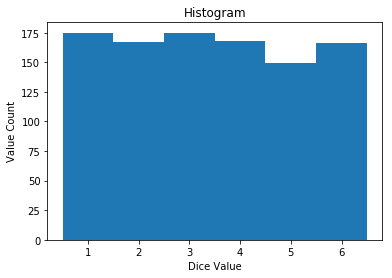

1    175
2    167
3    175
4    168
5    149
6    166
Name: Value, dtype: int64

In [10]:
# Read the csv.
roll_the_dice_thousand = pd.read_csv('data/roll_the_dice_thousand.csv', index_col=0)
roll_the_dice_thousand.columns = ['Roll', 'Value']

# Calculate the frequency distribution.
frequency = roll_the_dice_thousand['Value'].value_counts(sort=False)

# Histogram
bins = [n + 0.5 for n in range(0,7)]
roll_the_dice_thousand['Value'].hist(bins=bins, grid=False)
plt.xlabel('Dice Value')
plt.ylabel('Value Count')
plt.title('Histogram')

# Show the plot.
plt.show()
frequency

`Comments:`

In this plot we can see that the distribution is now more uniform than before, which is the behaviour we were expecting because all numbers are equally probable. The histogram changed because now we have more samples of random dice rolls and the sample distribution tends to be more similar to the population distribution.

## Challenge 4
In the `ages_population` files, we will find some information about a poll we did to a thousand people. Each file corresponds to a different neighbourhood.
 
Read the csv `ages_population.csv`. Here you have a poll we did to people from here in Barcelona about their ages. You will find each observation in the csv.
* Calculate the frequency distribution and plot it as we did during the lesson. Define a range for the mean and std with the eye.
* Calculate the mean and the standard deviation and compare it with your range. Does it fit?
* Now read the csv `ages_population2.csv` and calculate the frequency distribution and plot it.
* What do you see? Is there any difference?
* Calculate the mean and std and compare with the last one. What do you think?

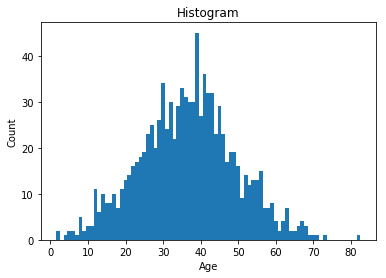

In [11]:
# Read the csv
ages_population = pd.read_csv('data/ages_population.csv')
ages_population = ages_population.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population['observation'].max()) + 1
min_range = int(ages_population['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

`Comments:`

The mean should be around 35 years and the standard deviation, as we can see than the distribution is normal, should be 10.

In [12]:
ages_population['observation'].describe()

count    1000.0000
mean       36.5600
std        12.8165
min         1.0000
25%        28.0000
50%        37.0000
75%        45.0000
max        82.0000
Name: observation, dtype: float64

`Comments:`

Yes, the exact results are similar to the ones expected.

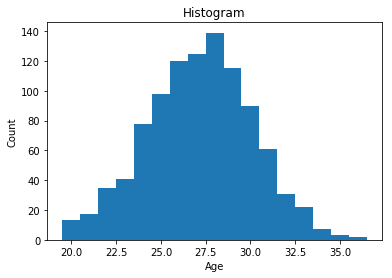

In [13]:
# Read the csv
ages_population_2 = pd.read_csv('data/ages_population2.csv')
ages_population_2 = ages_population_2.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population_2['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population_2['observation'].max()) + 1
min_range = int(ages_population_2['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population_2['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

`Comments:`

It seems that this time we have a narrower range of ages. Now, the mean value should be around 27 and the standard deviation around 2. We can see that the people in this neighbourhood are younger compared to the first neighbourhood, where the range was wider and there was more middle-aged people. 

In [14]:
ages_population_2['observation'].describe()

count    1000.000000
mean       27.155000
std         2.969814
min        19.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        36.000000
Name: observation, dtype: float64

`Comments:`

The exact results are similar to the ones expected.

## Challenge 5
Now is the turn of `ages_population3.csv`.
* Calculate the frequency distribution and plot it as we did during the lesson. 
* Calculate the mean and std and compare with the plot. What is happening?
* Calculate the four quartiles and give some arguments for the last question using them. How much difference there is between median and mean?
* Calculate some other percentiles that can be useful to give more arguments. 

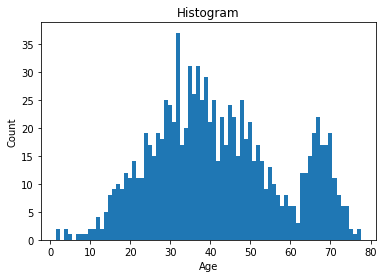

In [15]:
# Read the csv
ages_population_3 = pd.read_csv('data/ages_population3.csv')
ages_population_3 = ages_population_3.sort_values(by='observation')

# Calculate the frequency distribution.
frequency = ages_population_3['observation'].value_counts(sort=False)

# Histogram
max_range = int(ages_population_3['observation'].max()) + 1
min_range = int(ages_population_3['observation'].min())
bins = [n + 0.5 for n in range(min_range,max_range)]
ages_population_3['observation'].hist(bins=bins, grid=False)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram')

# Show the plot.
plt.show()

In [16]:
ages_population_3['observation'].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

In [17]:
ages_population_3['observation'].quantile(0.85)

64.0

`Comments:`

We can see that the distribution is now formed by two normals. The first one is centered around 35 and is formed by a lot more samples than the second one, which is centered around 68 approximately. 

If we take a look at the quartiles, we can see that 75% of the samples have a value lower or equal to 53, which would be part of the first normal. So the second normal is formed by approximately the 25% of the total samples. If we check the 85% quantile, we can see that 15% of the samples are greater or equal than 64, which is the approximately the limit between both normals. So we can say that, more exactly, the first normal is formed by approximately 85% of the samples while the second is formed by 15% of the samples. 

The mean is higher than the median because it is more affected by the second normal. However, the median is lower because it is more robust to extreme values.

## Bonus challenge
Take the information about the 3 neighbourhoods and compare them. Prepare a report about the three of them, about their similarities and their differences basing your arguments in the basic statistics.

In [18]:
sumamry_df = pd.concat([ages_population['observation'], 
                        ages_population_2['observation'], 
                        ages_population_3['observation']], 
                        axis=1, keys=['df1', 'df2', 'df3'])
sumamry_df.describe()

,df1,df2,df3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000
